In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-sales-2024/vgchartz-2024.csv


# Data Load

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/video-game-sales-2024/vgchartz-2024.csv')

In [3]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


# Missing Values

In [5]:
df.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

#### developer

In [6]:
import numpy as np

developer_na = np.where(df['developer'].isnull(),True,False)

df['developer'] = df['developer'].fillna(df['publisher'])

df[developer_na].head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
8486,/games/boxart/21030ccc.jpg,Gourmet Chef: Cook Your Way to Fame,DS,Misc,Ubisoft,Ubisoft,NaN,0.14,0.13,NaN,NaN,0.01,2008-06-24,NaN
10832,/games/boxart/2426879ccc.jpg,Wordmaster,DS,Strategy,"Destination Software, Inc","Destination Software, Inc",NaN,0.09,0.09,NaN,0.0,0.01,2008-08-12,NaN
18185,/games/boxart/8436780ccc.jpg,SAS: Secure Tomorrow,PC,Shooter,City Interactive,City Interactive,NaN,0.00,NaN,NaN,0.0,0.00,2008-10-16,NaN
18455,/games/boxart/default.jpg,My Baby and Me,Wii,Misc,Unknown,Unknown,NaN,0.00,NaN,NaN,0.0,NaN,NaN,NaN
19925,/games/boxart/default.jpg,Bounty Hunter,PC,Action,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1999-11-30,NaN


#### sales

In [7]:
sales_col = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

df[sales_col] = df[sales_col].fillna(0)

In [8]:
df[np.where(abs(df['total_sales'] - df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum(axis=1)) > 0.1,True, False)].shape[0]

0

#### update

In [9]:
rn_dnn = df['release_date'].isnull() & df['last_update'].notnull()
df.loc[np.where(rn_dnn, True, False), 'release_date'] = df.loc[np.where(rn_dnn, True, False),'release_date'].fillna(df['last_update'])

df[np.where(rn_dnn, True, False)].head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
6347,/games/boxart/full_dangan-ronpa_0JapanFront.jpg,Danganronpa: Trigger Happy Havoc,PSP,Adventure,Unknown,Spike,NaN,0.24,0.0,0.24,0.00,0.0,2018-01-11,2018-01-11
14436,/games/boxart/full_8639439JapanFrontccc.jpg,PriPara All Idol Perfect Stage!,NS,Misc,Unknown,Takara Tomy ARTS,NaN,0.03,0.0,0.03,0.00,0.0,2018-04-04,2018-04-04
15449,/games/boxart/full_9121088AmericaFrontccc.jpg,Zumba Fitness: World Party,X360,Misc,Unknown,Zoe Mode,NaN,0.02,0.0,0.00,0.02,0.0,2018-04-01,2018-04-01
19006,/games/boxart/full_8394432AmericaFrontccc.jpg,How to Survive 2,PC,Action,Unknown,EKO Software,NaN,0.00,0.0,0.00,0.00,0.0,2019-02-02,2019-02-02
19066,/games/boxart/full_6903656AmericaFrontccc.jpg,Geometry Dash,PC,Action,Unknown,RobTop Games,NaN,0.00,0.0,0.00,0.00,0.0,2019-02-03,2019-02-03


In [10]:
rnn_dn = df['release_date'].notnull() & df['last_update'].isnull()
df.loc[np.where(rnn_dn, True, False), 'last_update'] = df.loc[np.where(rnn_dn, True, False),'last_update'].fillna(df['release_date'])

df[np.where(rnn_dn, True, False)].head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013-09-17
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002-10-28
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013-09-17
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,2011-11-08
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,2010-11-09


In [11]:
rn_dn = df['release_date'].isnull() & df['last_update'].isnull()
# df.loc[np.where(rn_dn, True, False), 'release_date'] = df.loc[np.where(rn_dn, True, False),'release_date'].fillna(datetime.datetime())
# df.loc[np.where(rn_dn, True, False), 'last_update'] = df.loc[np.where(rn_dn, True, False),'last_update'].fillna(df['release_date'])
df[rn_dn].describe().round(2)

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,25.00,1752.00,1752.00,1752.00,1752.00,1752.00
mean,6.87,0.00,0.00,0.00,0.00,0.00
std,1.63,0.05,0.01,0.02,0.03,0.01
min,2.50,0.00,0.00,0.00,0.00,0.00
25%,6.00,0.00,0.00,0.00,0.00,0.00
50%,7.00,0.00,0.00,0.00,0.00,0.00
75%,8.00,0.00,0.00,0.00,0.00,0.00
max,9.00,1.84,0.25,0.42,1.10,0.33


it's so small values. so we can ignore it or..

In [12]:
# df = df[~rn_dn]

keep it.

In [13]:
import datetime

df['release_date'] = df['release_date'].fillna(datetime.datetime(1900, 1, 1))
df['last_update'] = df['last_update'].fillna(datetime.datetime(1900, 1, 1))

#### critic score

In [14]:
df[df['critic_score'].isnull()]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013-09-17
23,/games/boxart/full_2236292AmericaFrontccc.png,Halo 4,X360,Shooter,Microsoft Studios,343 Industries,NaN,9.96,6.72,0.04,2.36,0.83,2012-11-06,2012-11-06
25,/games/boxart/full_6532460AmericaFrontccc.jpg,Call of Duty: Black Ops IIII,PS4,Shooter,Activision,Treyarch,NaN,9.32,4.05,0.50,3.28,1.49,2018-10-12,2018-11-07
26,/games/boxart/full_5970958AmericaFrontccc.jpg,FIFA 19,PS4,Sports,Electronic Arts,EA Sports,NaN,9.15,0.84,0.10,6.87,1.34,2018-09-28,2018-09-12
33,/games/boxart/full_5731689AmericaFrontccc.jpg,FIFA 13,PS3,Sports,EA Sports,EA Canada,NaN,8.01,1.07,0.13,5.13,1.68,2012-09-25,2018-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,0.00,0.00,0.00,0.00,0.00,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,0.00,0.00,0.00,0.00,0.00,2019-02-28,2019-02-24


GTA V, HALO 4, CoD, FIFA... 🥲

<Axes: >

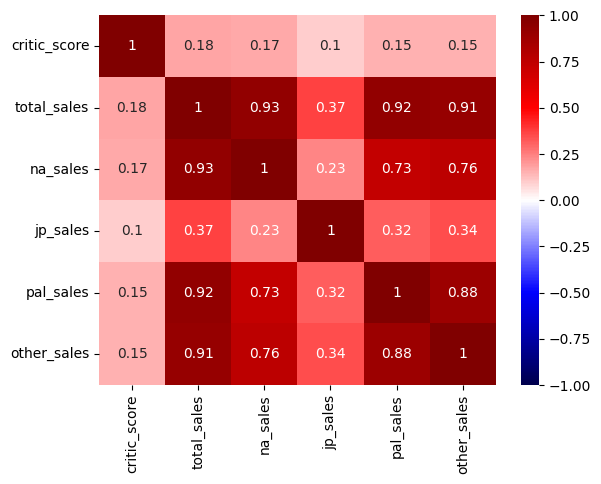

In [15]:
temp = df[df['critic_score'].notnull()]

import seaborn as sns
sns.heatmap(temp[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].corr(), 
            vmin = -1, vmax =1, cmap = 'seismic', annot = True)

critic score and sales has low correlation..  
it looks like that we dont have any solution for fix missing values of critic score.

<Axes: ylabel='Frequency'>

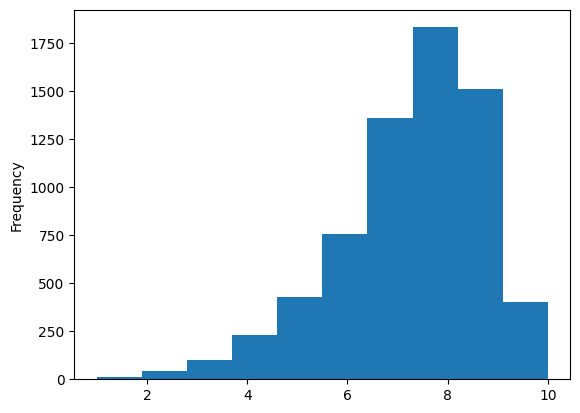

In [16]:
import matplotlib.pyplot as plt
df['critic_score'].plot(kind = 'hist')

hmmm...i'll keep going without filling missing values.

#### Drop img

In [17]:
df.drop(columns = 'img', inplace = True)

# EDA

In [18]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


## Top Selling 30

#### Title

In [19]:
df.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(30)

title
Grand Theft Auto V                   64.29
Call of Duty: Black Ops              30.99
Call of Duty: Modern Warfare 3       30.71
Call of Duty: Black Ops II           29.59
Call of Duty: Ghosts                 28.80
Call of Duty: Black Ops 3            26.72
Call of Duty: Modern Warfare 2       25.02
Minecraft                            24.01
Grand Theft Auto IV                  22.53
Call of Duty: Advanced Warfare       21.78
The Elder Scrolls V: Skyrim          20.51
Call of Duty: WWII                   19.82
Red Dead Redemption 2                19.71
Call of Duty 4: Modern Warfare       18.33
FIFA 15                              18.03
Battlefield 3                        17.32
FIFA 14                              17.31
FIFA 17                              17.02
FIFA 18                              16.92
Guitar Hero III: Legends of Rock     16.38
Grand Theft Auto: Vice City          16.19
Call of Duty: World at War           15.94
FIFA 16                              15.82
FIFA 

#### Franchise

In [20]:
franchise_list = ['Call of Duty', 'Grand Theft Auto', 'Minecraft', 'FIFA', 'Battlefield', 'LEGO', 'The Sims', 
                  'The Elder Scrolls', 'Red Dead Redemption', 'Guitar Hero', 'Assassin\'s Creed', 'Fallout', 'Destiny',
                 'Star Wars', 'Need for Speed', 'Arkham', 'Halo', 'Watch Dogs', 'Medal of Honor', 'Resident Evil', 'NFL', 
                 'Far Cry ', 'Overwatch', 'NBA', 'Harry Potter', 'Spider-Man', 'Tony Hawk\'s', 'Tomb Raider', 'Tom Clancy',
                 'Monopoly', 'Just Dance', 'Final Fantasy', 'WWE', 'Street Fighter', 'Mario', 'The Simpsons', 'Borderlands', 'Uncharted',
                 'The Lord of the Rings', 'Crash Bandicoot']

df['franchise'] = np.NaN
for each_franchise in franchise_list:
    df['franchise'] = np.where(df['title'].str.contains(each_franchise), each_franchise, df['franchise'])
    
df['franchise'] = np.where(df['title'].str.contains('Lego'), 'LEGO', df['franchise'])

df['franchise'] = np.where(df['franchise'] == 'nan', df['title'], df['franchise'])

In [21]:
# df[df['franchise'] == 'nan'].groupby('title')['total_sales'].sum().sort_values(ascending=False).head(10)

In [22]:
df.groupby('franchise')['total_sales'].sum().sort_values(ascending=False).head(30)

franchise
Call of Duty           301.67
FIFA                   212.18
NFL                    166.18
Grand Theft Auto       155.26
NBA                    140.84
Star Wars              125.28
Need for Speed         104.82
LEGO                    99.30
Assassin's Creed        97.81
Tom Clancy              69.72
The Sims                69.48
Battlefield             64.66
WWE                     61.57
Guitar Hero             60.33
Tony Hawk's             51.66
The Elder Scrolls       43.91
Tomb Raider             42.43
Harry Potter            42.33
Final Fantasy           41.43
Medal of Honor          37.81
Just Dance              37.38
Spider-Man              36.90
Red Dead Redemption     35.09
Fallout                 33.69
Mario                   31.62
Destiny                 31.09
Arkham                  30.77
Minecraft               28.77
Halo                    27.29
Far Cry                 25.95
Name: total_sales, dtype: float64

#### Publisher

In [23]:
df['publisher'] = np.where(df['publisher'] == 'EA Sports', 'Electronic Arts', df['publisher'])
df['publisher'] = np.where(df['publisher'] == 'EA Sports BIG', 'Electronic Arts', df['publisher'])


df['publisher'] = np.where(df['publisher'] == 'Namco', 'Namco Bandai Games', df['publisher'])
df['publisher'] = np.where(df['publisher'] == 'Bandai', 'Namco Bandai Games', df['publisher'])
df['publisher'] = np.where(df['publisher'] == 'Namco Bandai', 'Namco Bandai Games', df['publisher'])

df['publisher'] = np.where(df['publisher'] == 'Microsoft Studios', 'Microsoft Game Studios', df['publisher'])

df['publisher'] = np.where(df['publisher'] == 'Warner Bros. Interactive', 'Warner Bros. Interactive Entertainment', df['publisher'])

df['publisher'] = np.where(df['publisher'] == '2K Sports', '2K Games', df['publisher'])

df['publisher'] = np.where(df['publisher'] == 'Konami', 'Konami Digital Entertainment', df['publisher'])

In [24]:
df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(30)

publisher
Electronic Arts                           1157.30
Activision                                 722.77
Ubisoft                                    462.57
THQ                                        320.89
Sony Computer Entertainment                311.08
Konami Digital Entertainment               241.30
Rockstar Games                             239.67
Namco Bandai Games                         231.66
Sega                                       206.38
Warner Bros. Interactive Entertainment     181.58
2K Games                                   160.88
Nintendo                                   140.80
Capcom                                     131.24
LucasArts                                  118.48
Microsoft Game Studios                     113.94
Bethesda Softworks                         111.08
Disney Interactive Studios                 103.30
Atari                                      101.63
Square Enix                                 95.74
Midway Games                            

## Platform Power

In [25]:
df['console'].unique()

array(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS',
       'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64',
       'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC',
       'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX',
       'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux',
       'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue',
       'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5',
       'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi',
       'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16'], dtype=object)

In [26]:
df['console_comapny'] = np.nan

    
df['console_comapny'] = df['console'].map({'PS3': 'Sony', 'PS4': 'Sony', 'PS2': 'Sony', 'PS5': 'Sony', 
                                           'PSP': 'Sony', 'PS': 'Sony', 'PSN': 'Sony', 'PSV': 'Sony', 
                                           
                                           'X360': 'Microsoft', 'XOne': 'Microsoft', 'XS': 'Microsoft', 
                                           'XB': 'Microsoft', 'XBL': 'Microsoft',
                                          
                                           'PC': 'PC', 
                                           
                                           'Wii': 'Nintendo', 'DS': 'Nintendo', 'GBA': 'Nintendo', 'N64': 'Nintendo',
                                           'GBC': 'Nintendo', 'GC': 'Nintendo', '3DS': 'Nintendo', 'GB': 'Nintendo', 
                                           'WiiU': 'Nintendo', 'SNES': 'Nintendo', 'NES': 'Nintendo', 'NS': 'Nintendo', 
                                           
                                           'DC': 'Sega', 'SAT': 'Sega', 'GG': 'Sega', 'MSD': 'Sega', 'MS': 'Sega', 
                                           'GEN': 'Sega', 'SCD': 'Sega', 
                                           
                                           '2600': 'atari', '7800': 'atari',
                                           
                                           'iOS': 'Apple', 'ApII': 'Apple',
                                           
                                           'And': 'Google',
                                          })

df['console_comapny'] = df['console_comapny'].fillna('ETC')

#### Sales

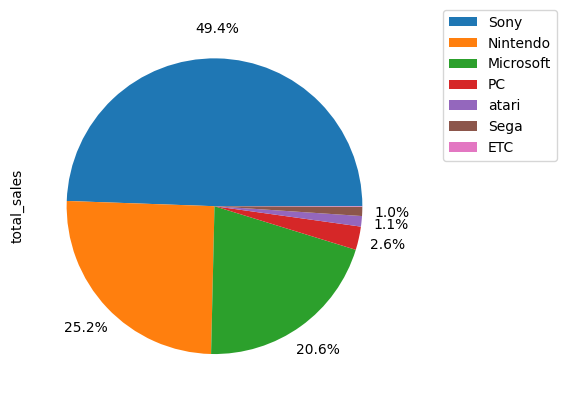

In [27]:
autopct = lambda v: f'{v:.1f}%' if v > 1 else None

df.groupby('console_comapny')['total_sales'].sum().sort_values(ascending=False).plot(kind = 'pie', autopct=autopct, 
                                                                                     labeldistance=None, pctdistance=1.2)
plt.legend(bbox_to_anchor=(1.1, 1.05))

#### Title Numbers

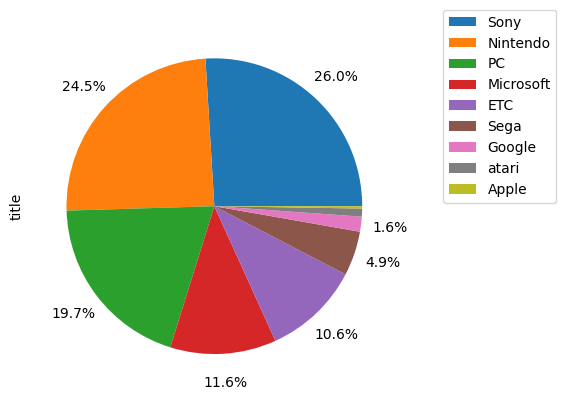

In [28]:
autopct = lambda v: f'{v:.1f}%' if v > 1 else None

df.groupby('console_comapny')['title'].count().sort_values(ascending=False).plot(kind = 'pie', autopct=autopct, 
                                                                                     labeldistance=None, pctdistance=1.2)
plt.legend(bbox_to_anchor=(1.1, 1.05))

#### Sony Playstation

<Axes: xlabel='console', ylabel='total_sales'>

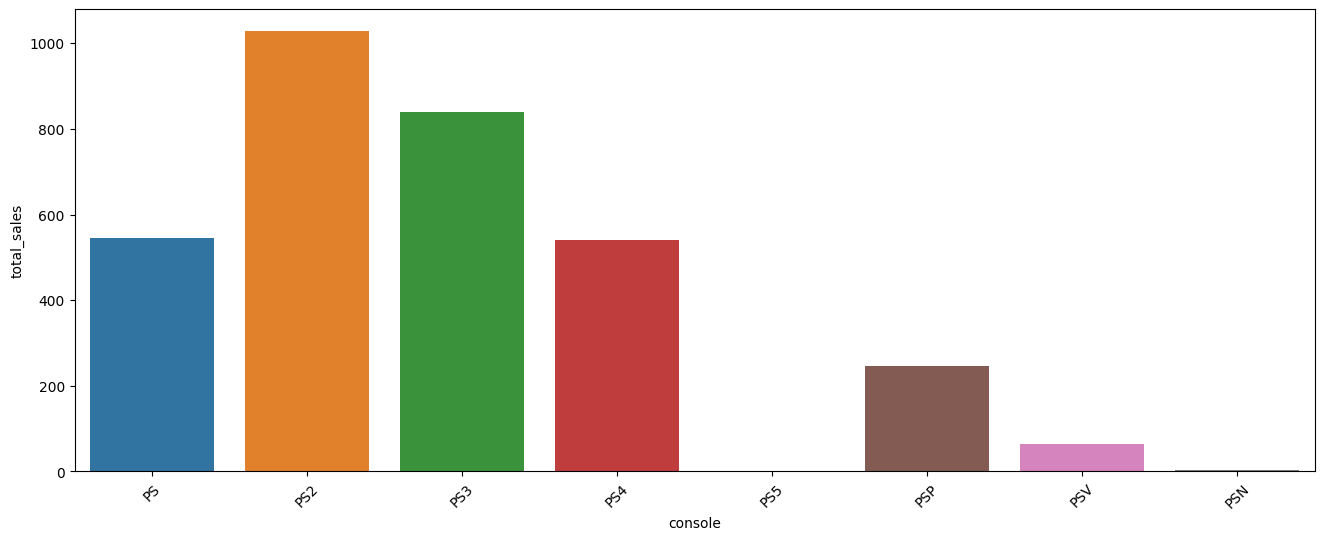

In [29]:
import seaborn as sns

fig, ax = plt.subplots( figsize = ( 16, 6 ) )
plt.xticks(rotation=45)
sns.barplot(data=df[df['console_comapny'] == 'Sony'], 
            x='console', y='total_sales', errorbar=None, estimator = 'sum',
            order = ['PS', 'PS2', 'PS3', 'PS4', 'PS5', 'PSP', 'PSV', 'PSN'])

There is a missing values in PS5 Earning

In [30]:
df[df['console'] == 'PS5'].head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,franchise,console_comapny
23352,Dawn of the Monsters,PS5,Action,Unknown,13AM Games,NaN,0.0,0.0,0.0,0.0,0.0,2022-03-10,2022-03-10,Dawn of the Monsters,Sony
23506,Armored Core VI Fires of Rubicon,PS5,Action,Bandai Namco Entertainment,From Software,NaN,0.0,0.0,0.0,0.0,0.0,2023-08-25,2022-12-09,Armored Core VI Fires of Rubicon,Sony
23552,Blackwind,PS5,Action,Unknown,Drakkar Dev,NaN,0.0,0.0,0.0,0.0,0.0,2022-01-19,2022-01-19,Blackwind,Sony
23576,BloodRayne Betrayal: Fresh Bites,PS5,Action,Unknown,WayForward,NaN,0.0,0.0,0.0,0.0,0.0,2021-06-14,2021-06-14,BloodRayne Betrayal: Fresh Bites,Sony
23613,Cannon Dancer – Osman,PS5,Action,Unknown,Mitchell Corporation,NaN,0.0,0.0,0.0,0.0,0.0,2023-04-12,2023-04-12,Cannon Dancer – Osman,Sony


In [31]:
df[df['console'] == 'PS5']['total_sales'].sum()

0.0

#### Microsoft Xbox

<Axes: xlabel='console', ylabel='total_sales'>

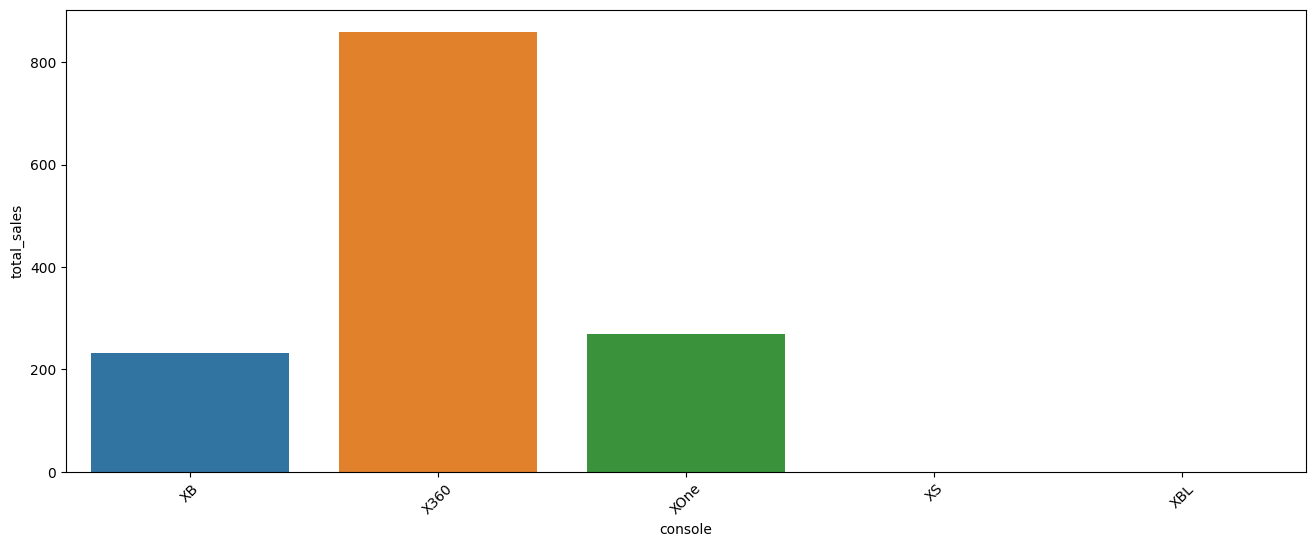

In [32]:
import seaborn as sns

fig, ax = plt.subplots( figsize = ( 16, 6 ) )
plt.xticks(rotation=45)
sns.barplot(data=df[df['console_comapny'] == 'Microsoft'], 
            x='console', y='total_sales', errorbar=None, estimator = 'sum',
            order = ['XB', 'X360', 'XOne', 'XS', 'XBL'])

There is a missing values in XS Earning

In [33]:
df[df['console'] == 'XS'].head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,franchise,console_comapny
23350,Dawn of the Monsters,XS,Action,Unknown,13AM Games,NaN,0.0,0.0,0.0,0.0,0.0,2022-03-10,2022-03-10,Dawn of the Monsters,Microsoft
23504,Armored Core VI Fires of Rubicon,XS,Action,Bandai Namco Entertainment,From Software,NaN,0.0,0.0,0.0,0.0,0.0,2023-08-25,2022-12-09,Armored Core VI Fires of Rubicon,Microsoft
23521,Azure Striker Gunvolt 3,XS,Action,Unknown,Inti Creates,NaN,0.0,0.0,0.0,0.0,0.0,2022-08-18,2022-08-18,Azure Striker Gunvolt 3,Microsoft
23550,Blackwind,XS,Action,Unknown,Drakkar Dev,NaN,0.0,0.0,0.0,0.0,0.0,2022-01-19,2022-01-19,Blackwind,Microsoft
23577,BloodRayne Betrayal: Fresh Bites,XS,Action,Unknown,WayForward,NaN,0.0,0.0,0.0,0.0,0.0,2021-06-14,2021-06-14,BloodRayne Betrayal: Fresh Bites,Microsoft


In [34]:
df[df['console'] == 'XS']['total_sales'].sum()

0.0

In [35]:
df[df['console'] == 'XBL']['total_sales'].sum()

0.2

## Market Share

#### Region

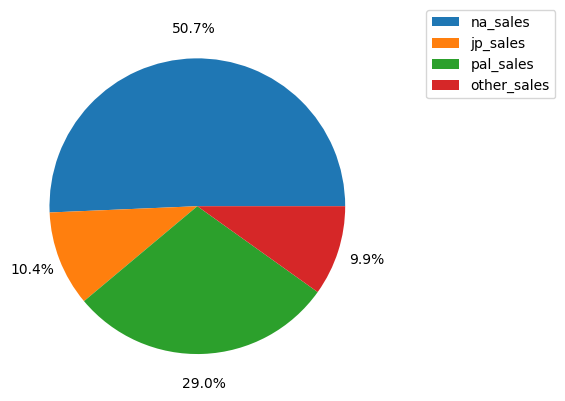

In [36]:
df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().plot(kind = 'pie', autopct='%1.1f%%', 
                                                                                     labeldistance=None, pctdistance=1.2)
plt.legend(bbox_to_anchor=(1.1, 1.05))

#### Genre

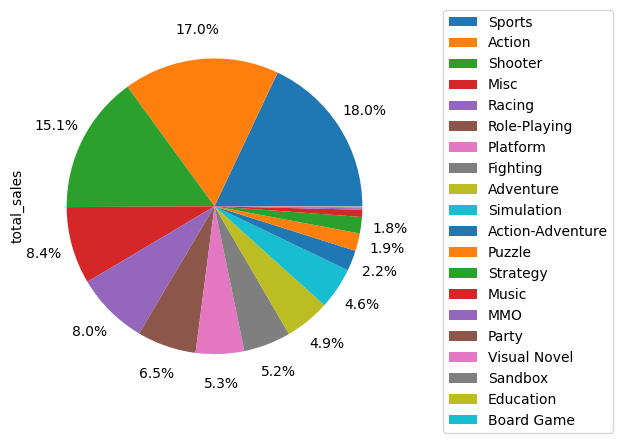

In [37]:
autopct = lambda v: f'{v:.1f}%' if v > 1 else None

df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind = 'pie', autopct=autopct, 
                                                                                     labeldistance=None, pctdistance=1.2)
plt.legend(bbox_to_anchor=(1.1, 1.05))

#### Region and genre

<Axes: xlabel='genre', ylabel='sales'>

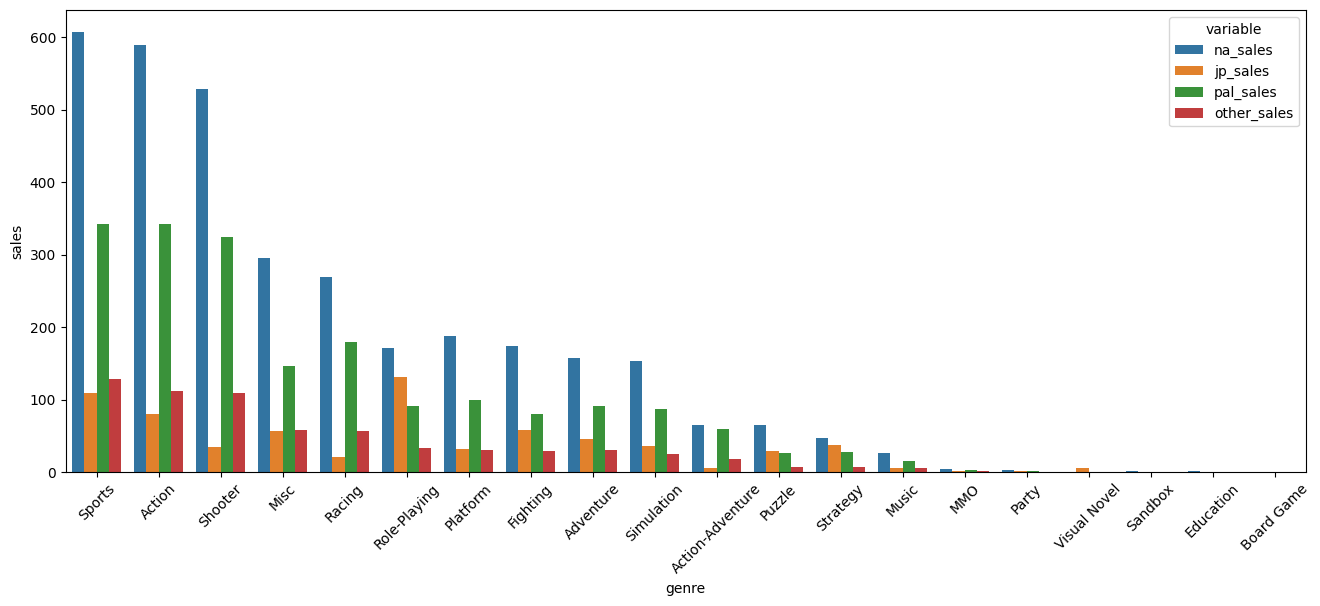

In [38]:
import seaborn as sns

fig, ax = plt.subplots( figsize = ( 16, 6 ) )
plt.xticks(rotation=45)
sns.barplot(data=df.melt(id_vars = 'genre', value_vars = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales'], value_name = 'sales'), 
            x='genre', y='sales', hue = 'variable', errorbar=None, estimator = 'sum',
            order = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).index)

#### JP Market
RPG is very Popular.

<Axes: xlabel='genre', ylabel='jp_sales'>

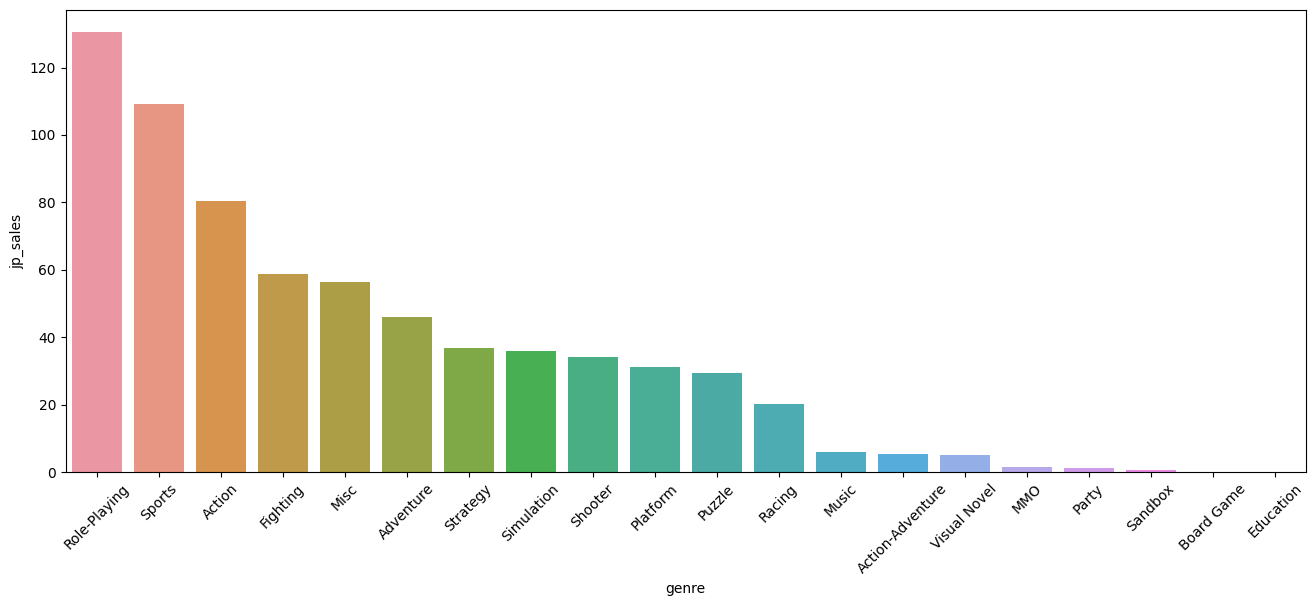

In [39]:
import seaborn as sns

fig, ax = plt.subplots( figsize = ( 16, 6 ) )
plt.xticks(rotation=45)
sns.barplot(data=df, 
            x='genre', y='jp_sales', errorbar=None, estimator = 'sum',
            order = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).index)